### Neural Network with PyTorch

In [46]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torch import optim
import helper
import matplotlib.pyplot as plt

In [16]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,), (0.5,)),])

#Dataset using DataLoader
trainset = datasets.MNIST(root='MNIST/',train=True, transform=transform, download=True)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#### TrainLoader is a generator. We need to iter 

In [17]:
dataiter = iter(trainLoader)
images,labels = dataiter.next()


In [18]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


#### Visualize the first image
- image[index].numpy().squeeze()


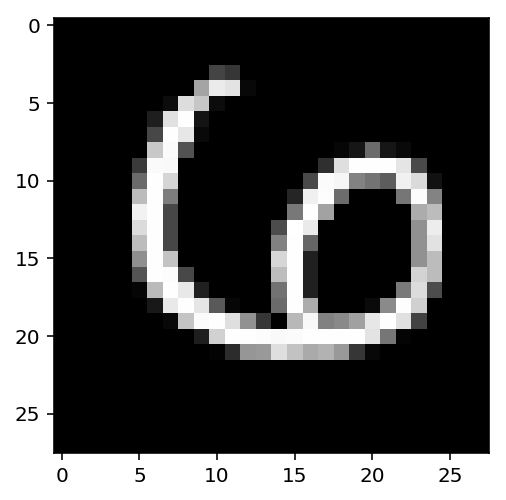

In [21]:
plt.imshow(X = images[1].numpy().squeeze(), cmap='Greys_r')

In [23]:
def activation(x):
    return 1/(1+torch.exp(-x))

#flatten the input image

inputs = images.view(images.shape[0],-1)

#layer 1 [784 input, 256 hidden ]
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

forward = activation(torch.mm(inputs, w1) +b1)
out = torch.mm(forward, w2)+b2

In [24]:
print(out.shape)

torch.Size([64, 10])


#### Implementing Softmax as an activation for multi-class classification

In [25]:
def softmax(x):
    return torch.exp(x)/ torch.sum(torch.exp(x), dim=1).view(-1,1)

probabilities = softmax(out)

###check the shape 
print(probabilities.shape)


### check the total sum of probabilities =1

print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])




#### Building NN with PyTorch


In [26]:
from torch import nn

In [29]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Layer 1 [784 in , 256 out]
        self.hidden = nn.Linear(784, 256)
        
        #Layer 2 [256 in, 10 out]
        self.output = nn.Linear(256, 10)
        
        #Activation
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [30]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

### Using torch.nn.Functional

In [31]:
import torch.nn.functional as F

In [32]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Layer 1 --> Input to hidden Layer 
        self.hidden = nn.Linear(784, 256)
        self.out    = nn.Linear(256, 10)
        
        def forward(self, x):
            x = F.sigmoid(self.hidden(x))
            x = F.softmax(self.out(x), dim=1)
            
            return x
            

#### Building a NN with ip[874] layer1[128][relu] layer2[64][relu]   out[10][softmax]   losslayer[cross-entropy]

In [35]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Input Layer 
        
        self.Input = nn.Linear(784, 128)
        self.Layer1 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.Input(x))
        x = F.relu(self.Layer1(x))
        x = F.softmax(self.out(x), dim = 1)
        x = F.cross_entropy(x)
        
        return x
            
            

In [36]:
model = NN()
model

NN(
  (Input): Linear(in_features=784, out_features=128, bias=True)
  (Layer1): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

In [49]:
### Building a feed-foward network

model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

epochs = 10
#Loss
criterion = nn.NLLLoss()

#SGD
optimizer = optim.SGD(model.parameters(), lr = 0.01)

for e in range(epochs):
    running_loss =0
    for images, labels in trainLoader:
        
        #Flatten the input
        images = images.view(images.shape[0], -1)
        
        ## Training pass 
        optimizer.zero_grad()  # to avoid the vanishing gradient 
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        #keep track of Total Loss
        running_loss += loss.item()
        
    else:
        print(f"Training Loss: {running_loss/len(trainLoader)}")





Training Loss: 1.0525056478311259
Training Loss: 0.3850178111717899
Training Loss: 0.32028377052944607
Training Loss: 0.2866106097505037
Training Loss: 0.2604758226747579
Training Loss: 0.2386463022133562
Training Loss: 0.2189384249767769
Training Loss: 0.20194641280688966
Training Loss: 0.18613192503417986
Training Loss: 0.17277776296220737


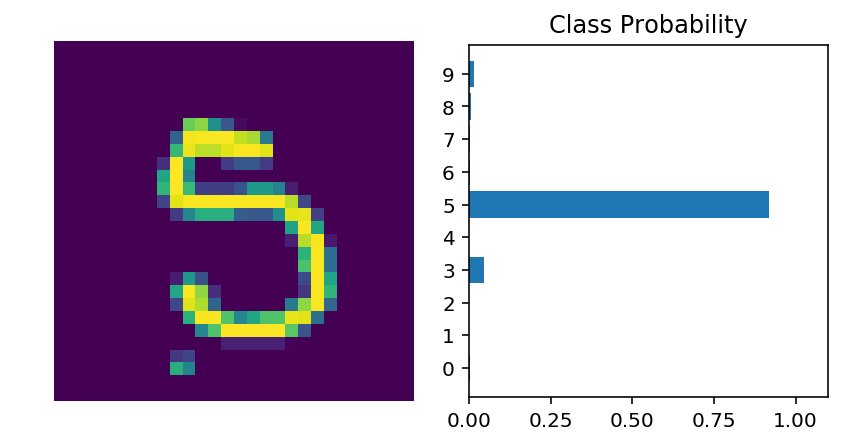

In [53]:
images , labels = next(iter(trainLoader))

img = images[0].view(1, 784)

#Turn off the gradient to speed up this part
with torch.no_grad():
    logits = model.forward(img)
    
#output is logits, need softmax for the multi-class classification probability

ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1,28,28), ps)